### Dealing with repeated measurements - Exercises & Answers

### 1. Educational hierarchies
One of the classic examples of using linear mixed models is in education, because the models can incorporate the variation that students contribute to tests, being that they're in different classrooms in different schools. 

Our first exercise is to examine a simple relationship - what is the association between the number of maths homework assignments a student completes and their scores on their mathematics exam? The dataset however has information on this relatonship from *10* different schools, and we want to incorporate that variability (because some schools may teach mathematics better or worse than others) into our model. 

The dataset is available here: https://raw.githubusercontent.com/SuryaThiru/hierarchical-model-blog/refs/heads/master/mlmldata.csv

First import the usual things we need to get started:

In [1]:
# Your answer here
# Imports
import pandas as pd # dataframes
import seaborn as sns # plots
import statsmodels.formula.api as smf # Models
import marginaleffects as me # marginal effects
import numpy as np # numpy for some functions
import statsmodels.tools.eval_measures as measures

# Set the style for plots
sns.set_style('whitegrid')
sns.set_context('talk')

Next, read in the data. There are a lot of columns here but we do not need many, only `schid` (school identifier), `homework`, the number of assignments they completed, and `math`, the students score on a mathematics exam. Read into a dataframe called `school`, show the top 10 rows.

In [2]:
# Your answer here
# Read in data
school = pd.read_csv('https://raw.githubusercontent.com/SuryaThiru/hierarchical-model-blog/refs/heads/master/mlmldata.csv')
school.head(10)

,schid,stuid,ses,meanses,homework,white,parented,public,ratio,percmin,math,sex,race,sctype,cstr,scsize,urban,region,schnum
0,7472,3,-0.13,-0.482609,1,1,2,1,19,0,48,2,4,1,2,3,2,2,1
1,7472,8,-0.39,-0.482609,0,1,2,1,19,0,48,1,4,1,2,3,2,2,1
2,7472,13,-0.80,-0.482609,0,1,2,1,19,0,53,1,4,1,2,3,2,2,1
3,7472,17,-0.72,-0.482609,1,1,2,1,19,0,42,1,4,1,2,3,2,2,1
4,7472,27,-0.74,-0.482609,2,1,2,1,19,0,43,2,4,1,2,3,2,2,1
5,7472,28,-0.58,-0.482609,1,1,2,1,19,0,57,2,4,1,2,3,2,2,1
6,7472,30,-0.83,-0.482609,5,1,2,1,19,0,33,2,4,1,2,3,2,2,1
7,7472,36,-0.51,-0.482609,1,1,3,1,19,0,64,1,4,1,2,3,2,2,1
8,7472,37,-0.56,-0.482609,1,1,2,1,19,0,36,2,4,1,2,3,2,2,1
9,7472,42,0.21,-0.482609,2,1,3,1,19,0,56,2,4,1,2,3,2,2,1


Can you use `seaborn` to visualise the association between homework and math for each of the ten schools, with a scatterplot?

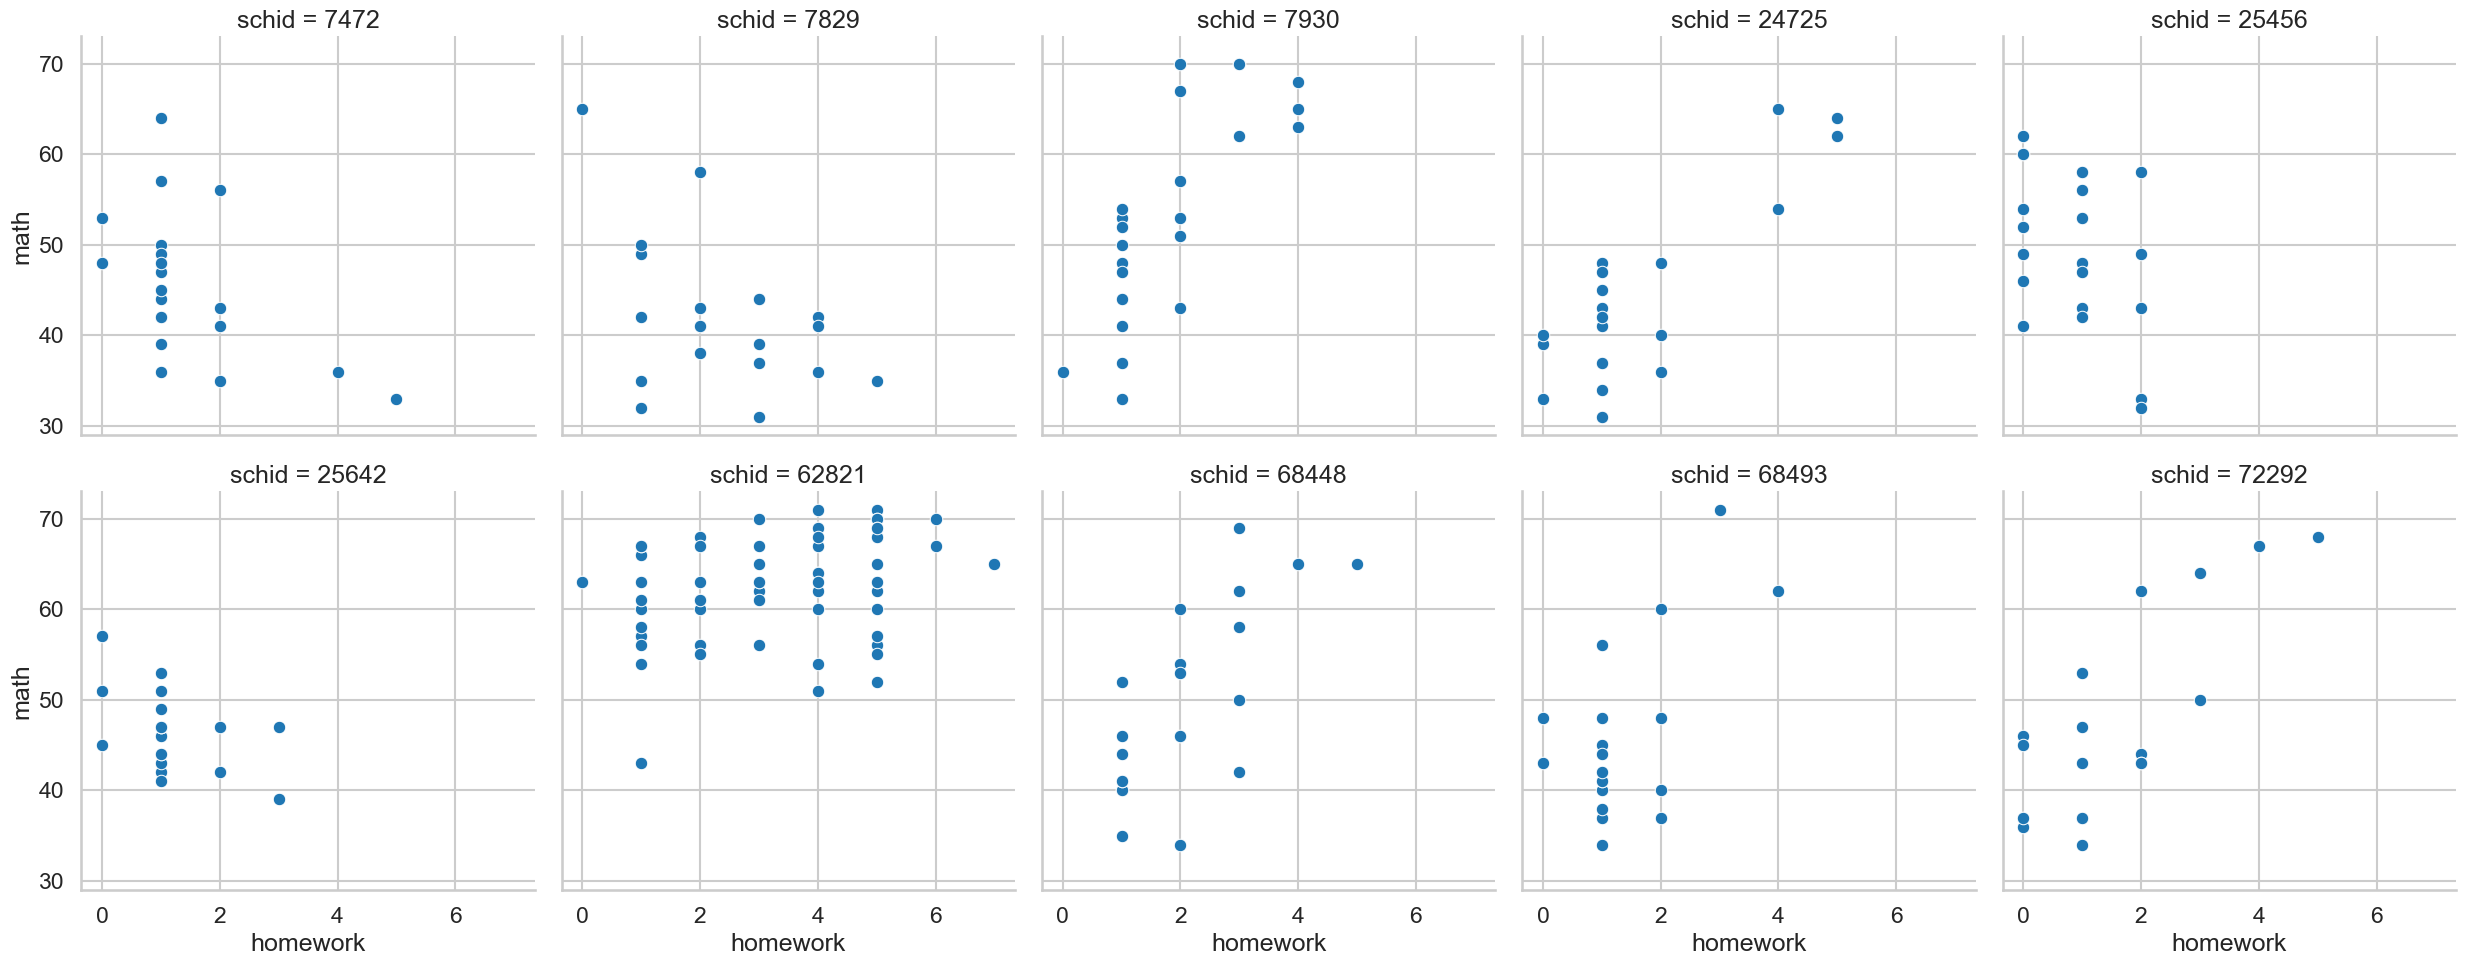

In [3]:
# Your answer here
# Visualise all associations
sns.relplot(data=school,
            x='homework', y='math',
            col='schid', col_wrap=5,
            kind='scatter')

Now, fit a simple GLM predicting math score from homework, which ignores the school id variable. We will use this to compare to a mixed model.

In [4]:
# Your answer here
# GLM
glm = smf.ols('math ~ homework', data=school).fit()
glm.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
No. Observations:                 260   F-statistic:                     84.64
Covariance Type:            nonrobust   Prob (F-statistic):           1.25e-17
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.0739      0.989     44.580      0.000      42.127      46.021
homework       3.5719      0.388      9.200      0.000       2.807       4.336
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, lets incorporate the variability from schools by giving a random intercept to schools, using a mixed model.

In [5]:
# Your answer here
# Mixed models
mix = smf.mixedlm('math ~ homework',
                  groups='schid',
                  data=school).fit()
mix.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: math     
No. Observations: 260     Method:             REML     
No. Groups:       10      Scale:              64.5228  
Min. group size:  20      Log-Likelihood:     -919.9738
Max. group size:  67      Converged:          Yes      
Mean group size:  26.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    44.982    1.803 24.947 0.000 41.448 48.516
homework      2.207    0.381  5.798 0.000  1.461  2.952
schid Var    25.226    1.630                           
=======================================================

"""

What happened to the association between homework and scores when incorporating the random effect of schools? Bonus points if you can plot the fitted values from the mixed model. 

Next, let us add some more complexity. Our existing mixed model incorporates only each schools baseline maths score (a good way to find out which school is over-or-under-performing). It assumes the amount of homework completed has *the same effect on maths exam scores* for every school. That' not realistic. Expand the model so it allows this effect to vary (e.g., a random slope for homework).

In [6]:
# Your answer here
# mixed model with random slope
mix2 = smf.mixedlm('math ~ homework',
                   groups='schid',
                   re_formula='homework',
                   data=school).fit()

mix2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:               MixedLM    Dependent Variable:    math     
No. Observations:    260        Method:                REML     
No. Groups:          10         Scale:                 43.0710  
Min. group size:     20         Log-Likelihood:        -881.9772
Max. group size:     67         Converged:             Yes      
Mean group size:     26.0                                       
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             44.771    2.744 16.314 0.000 39.392 50.149
homework               2.040    1.555  1.312 0.190 -1.008  5.089
schid Var             69.304    5.437                           
schid x homework Cov -31.762    2.812                           
homework Var          22.453    1.787                           
================================================================

"""

**Now** what happens to the association? More bonus points if you can include the predictions in a plot.

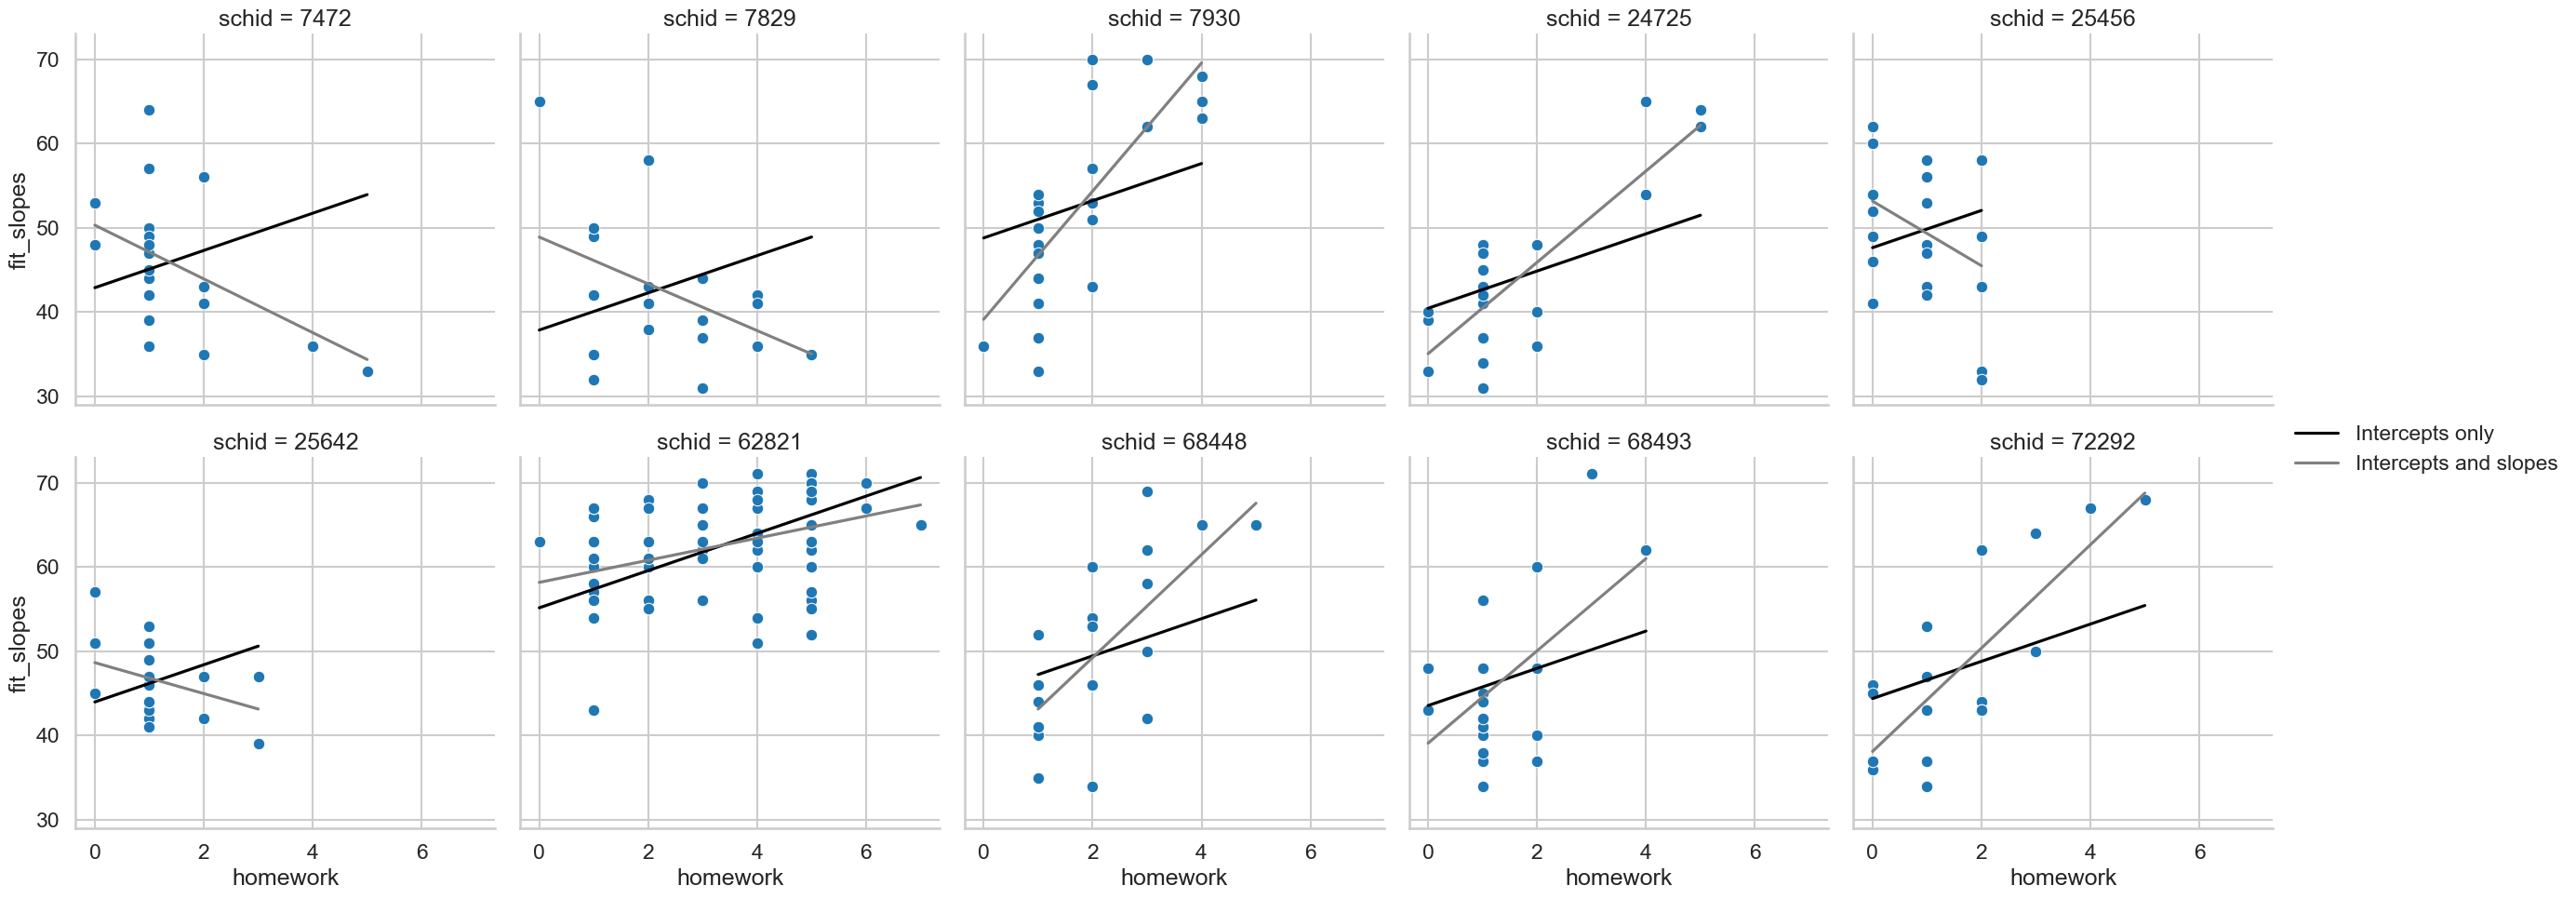

In [7]:
# Your answer here
# Including fitted values
school['fit_slopes'] = mix2.fittedvalues
school['fit_intercept'] = mix.fittedvalues
(sns.relplot(data=school,
             x='homework', y='math',
             col='schid', col_wrap=5,
             kind='scatter')
 .map_dataframe(sns.lineplot, x='homework', y='fit_intercept', color='black', label='Intercepts only')
 .map_dataframe(sns.lineplot, x='homework', y='fit_slopes', color='grey', label='Intercepts and slopes')
 .add_legend()
)

### 2. Cosmetics and attractiveness
In the workshop we examined a model that included a random intercept for participants, a random intercept for models (both of those accounting for baseline levels of attractiveness ratings that each participant and model gives) and a random slope for cosmetics for each model (the model figures out the effect of a makeup application on the attractiveness of each model). 

There's at least one more effect that was not considered here, which is how makeup affects the perceptions of each **rater**. Each rater may differ in their response to cosmetics, with some liking it, and some being put off by it. Can you read in the data from the example and expand the model to include the random slope for raters too?

In [8]:
# Your answer here
# Read in data
cosmetics = pd.read_csv('https://raw.githubusercontent.com/alexjonesphd/py4psy2024/refs/heads/main/jones_kramer_2015.csv')

# Add the grouping factor
cosmetics['grouping'] = 1

# Expand the random effects to include rater random slopes like this
re = {'pid': '0 + C(pid)', 
      'model_id': '0 + C(model_id)',
      'cosmetics_model': '0 + C(model_id):cosmetics_code',
      'cosmetics_pid': '0 + C(pid):cosmetics_code'}

# Fit the odel
expand = smf.mixedlm('rating ~ cosmetics_code',
                     groups='grouping',
                     vc_formula=re,
                     data=cosmetics).fit()

expand.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:               MixedLM  Dependent Variable:  rating    
No. Observations:    3003     Method:              REML      
No. Groups:          1        Scale:               1.4235    
Min. group size:     3003     Log-Likelihood:      -5048.0688
Max. group size:     3003     Converged:           Yes       
Mean group size:     3003.0                                  
-------------------------------------------------------------
                    Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           3.231    0.152 21.265 0.000  2.933  3.529
cosmetics_code      1.163    0.145  8.008 0.000  0.878  1.448
cosmetics_model Var 0.514    0.122                           
cosmetics_pid Var   0.322    0.063                           
model_id Var        0.561    0.125                           
pid Var             0.464    0.069                           
=============================================================

"""

Once you have estimated this model, can you figure out what source of variation contributes the most to the attractiveness judgements out of:
- Baseline attractiveness of models
- Baseline tendency of attractiveness ratings of raters
- Variation in the effect of cosmetics on models
- Variation in the effect of cosmetics on participants?

In [9]:
# Your answer here
# Sum up all random effects
total_variance = expand.vcomp.sum() + expand.scale

# Divide the vcomp by the total
expand.vcomp/total_variance

array([0.15664007, 0.09793443, 0.170859  , 0.14117325])

As an additional challenge - can you find the *rater* with the largest and smallest slope for cosmetics? This directly translates into someone for who cosmetics increased their ratings the most, and the one for who makeup was a major turn off. You will need to filter down the random effects which can be quite tricky.

In [10]:
# Your answer here
# Convert random effects to a dataframe
ranef = pd.DataFrame(expand.random_effects)

# Filter it to include only PID and cosmetics_code
ppt_slopes = ranef[ranef.index.str.contains('cosmetics_code') & ranef.index.str.contains('pid')]

# With that, find the min + max
mini = ppt_slopes.idxmin()
maxi = ppt_slopes.idxmax()

print(mini, maxi)

1    cosmetics_pid[C(pid)[58]:cosmetics_code]
dtype: object 1    cosmetics_pid[C(pid)[75]:cosmetics_code]
dtype: object


### 3. Further challenges in linear mixed effects models 
Linear mixed models are, essentially, a standard GLM with extra flexibility to account for observations in the data belonging to groups. As such, they are able to incorporate all the usual things a GLM can. Here, we'll use some more education data to examine whether there are differences between male and female A-level students on a Chemistry A-level score, and whether it is linked to their average GCSE score.

This data can be found from the Bristol Centre for Multilevel Modelling, [here](https://www.bristol.ac.uk/cmm/learning/mmsoftware/data-rev.html]). Download the datasets, and upload the `chem97.txt` file to the server to access it. The code below will read in the file for you (assuming you have uploaded it) and rename the columns to something meaningful, but you can also see the readout on the above page for more detail.

In [11]:
# Reads in data and renames columns
chem97 = pd.read_table('chem97.txt', sep='\s+', header=None)
chem97.columns = ['local_education_authority_ID', 'school_ID', 'pupil_ID', 'chem_Alevel_score', 'female', 'age_in_months', 'avg_GCSE']
chem97.head()

,local_education_authority_ID,school_ID,pupil_ID,chem_Alevel_score,female,age_in_months,avg_GCSE
0,1.0,1.0,1.0,4.0,1,3.0,6.625
1,1.0,1.0,2.0,10.0,1,-3.0,7.625
2,1.0,1.0,3.0,10.0,1,-4.0,7.250
3,1.0,1.0,4.0,10.0,1,-2.0,7.500
4,1.0,1.0,5.0,8.0,1,-1.0,6.444


Fit a linear mixed model that predicts chemistry A level score from the interaction between female (1 = yes, 0 = No) and aveage GCSE grade. Include random intercepts for education authority and school ID.

In [12]:
# Your answer here
chem97['grouping'] = 1 # creates group

# create random effects
re = {'ed_authority': '0 + C(local_education_authority_ID)',
      'school': '0 + C(school_ID)'}

# Model - this MAY TAKE A WHILE!
md = smf.mixedlm('chem_Alevel_score ~ female * avg_GCSE', 
                 groups='grouping',
                 vc_formula=re, 
                 data=chem97).fit()

md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:            MixedLM Dependent Variable: chem_Alevel_score
No. Observations: 31022   Method:             REML             
No. Groups:       1       Scale:              5.0495           
Min. group size:  31022   Log-Likelihood:     -70526.6060      
Max. group size:  31022   Converged:          Yes              
Mean group size:  31022.0                                      
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -9.500    0.133 -71.585 0.000 -9.760 -9.240
female              -2.377    0.209 -11.375 0.000 -2.787 -1.968
avg_GCSE             2.460    0.021 115.526 0.000  2.418  2.502
female:avg_GCSE      0.262    0.033   7.911 0.000  0.197  0.327
ed_authority Var     0.021    0.007                            
school Var           1.125    0.025                            
===============================================================

"""

With the model fitted, note the variance estimates and the coefficients. As with a GLM its not so easy to interpret whats going on - but we can rely on using average slopes to get conditional estimates, like always. Use `marginaleffects` to compute the slope for females and males with regards to GCSEs to explain the interaction. 

In [13]:
# Your answer here
# Get the slopes of GCSE for each sex
me.slopes(md, variables=['avg_GCSE'], by='female')

female,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
i64,str,str,f64,f64,f64,f64,f64,f64,f64
0,"""avg_GCSE""","""mean(dY/dX)""",2.459902,0.021293,115.526716,0.0,inf,2.418169,2.501635
1,"""avg_GCSE""","""mean(dY/dX)""",2.721689,0.02665,102.127443,0.0,inf,2.669456,2.773922


### 4. Studying individual differences with mixed models
As a final example, lets see how mixed models can be used to understand measures of individual differences. 

In the next dataset, we'll see how individual raters are sensitive to facial cues of symmetry, averageness, and sexual dimorphism, three important predictors of facial attractiveness. Participants rated 100 faces on how attractive they thought they were (on a scale of 1-100). For each of the faces, we measured how symmetrical, distinctive, and sexually dimorphic it was. 

First, read in the data from the following link and display the top 10 rows: https://raw.githubusercontent.com/alexjonesphd/py4psy2024/refs/heads/main/cue_sensitivity.csv

In [14]:
# Your answer here
cues = pd.read_csv('https://raw.githubusercontent.com/alexjonesphd/py4psy2024/refs/heads/main/cue_sensitivity.csv')
cues.head(10)

,pid,face_id,face_sex,attractiveness,distinctiveness,symmetry,dimorphism
0,3168134.0,galina,female,44,-1.535898,-0.926857,0.056173
1,3168134.0,tamara,female,25,1.506863,0.567697,-1.542840
2,3168134.0,blazej,male,50,1.066100,-1.977071,0.758609
3,3168134.0,irena,female,58,-1.196141,-0.929967,0.751037
4,3168134.0,jan,male,27,0.039301,0.769465,-0.082505
5,3168134.0,svatopluk,male,32,-0.676461,-1.102852,-0.591465
6,3168134.0,miroslav1,male,35,0.479499,1.627821,-0.714593
7,3168134.0,viola,female,61,-1.300203,1.283004,0.304360
8,3168134.0,vincent,male,2,0.715087,-1.160949,1.252532
9,3168134.0,blazana,female,69,-1.004162,0.838649,-0.965687


Each participant rates 100 faces and we know the measurements of those faces. Lets fit a model that uses those measurements as predictors and accounts for participant and face variability with random slopes, as a starter.

In [15]:
# Your answer here
cues['grouping'] = 1

# VC
vc = {'pid': '0 + C(pid)',
      'face': '0 + C(face_id)'}

# models
model1 = smf.mixedlm('attractiveness ~ distinctiveness + symmetry + dimorphism',
                     groups='grouping', vc_formula=vc, data=cues).fit()

model1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:            MixedLM Dependent Variable: attractiveness
No. Observations: 3200    Method:             REML          
No. Groups:       1       Scale:              227.0840      
Min. group size:  3200    Log-Likelihood:     -13408.9376   
Max. group size:  3200    Converged:          Yes           
Mean group size:  3200.0                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         35.681    2.225 16.038 0.000 31.321 40.042
distinctiveness   -2.398    1.013 -2.367 0.018 -4.383 -0.413
symmetry          -1.763    1.007 -1.752 0.080 -3.736  0.209
dimorphism        -0.389    1.034 -0.376 0.707 -2.415  1.638
face Var          89.992    0.944                           
pid Var          127.324    2.195                           
============================================================

"""

This model efffectively accounts for participant variability and face variability, and suggests only distinctiveness decreases attractiveness. But we must be clear on what it implies - it says that the effect of, say, distinctiveness is *exactly* the same for all raters. That is, raters are influenced by the distinctiveness of the face in the same way. Is this realistic? Would it be better to allow each rater their own distinctiveness slope (as well as others) to allow their own preferences to come out? We can do this of course by including a random slope for each rater for each trait. Do that below and see what happens.

In [16]:
# Your answer here
# VC
re = {'pid': '0 + C(pid)',
      'face': '0 + C(face_id)',
      'distinctiveness': '0 + C(pid):distinctiveness',
      'symmetry': '0 + C(pid):symmetry',
      'dimorphism': '0 + C(pid):dimorphism'}

# models
model2 = smf.mixedlm('attractiveness ~ distinctiveness + symmetry + dimorphism',
                     groups='grouping', vc_formula=re, data=cues).fit()

model2.summary()

/opt/miniconda3/envs/py11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
/opt/miniconda3/envs/py11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
/opt/miniconda3/envs/py11/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:             MixedLM  Dependent Variable:  attractiveness
No. Observations:  3200     Method:              REML          
No. Groups:        1        Scale:               222.5967      
Min. group size:   3200     Log-Likelihood:      -13424.8905   
Max. group size:   3200     Converged:           Yes           
Mean group size:   3200.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            35.681    2.282 15.633 0.000 31.208 40.155
distinctiveness      -2.398    1.517 -1.581 0.114 -5.371  0.575
symmetry             -1.763    1.509 -1.169 0.243 -4.721  1.194
dimorphism           -0.389    1.549 -0.251 0.802 -3.425  2.648
dimorphism Var        0.670    0.121                           
distinctiveness Var   0.591    0.060                           
face Var            209.005                                    
pid Var              97.593    1.352                           
symmetry Var          0.769    0.143                           
===============================================================

"""

Now the effects go away when you consider how variable these effects are for people. If we wanted, we could extract each persons individual slope to see how sensitive they are to an individual cue.